# Question B3

In [149]:
import pandas as pd
import metdata
from matplotlib import pyplot as plt

In [92]:
metdata.load_all()

load aberporth
load armagh
load ballypatrick
load bradford
load braemar
load camborne
load cambridge
load cardiff
load chivenor
load cwmystwyth
load dunstaffnage
load durham
load eastbourne
load eskdalemuir
load heathrow
load hurn
load lerwick
load leuchars
load lowestoft
load manston
load nairn
load newtonrigg
load oxford
load paisley
load ringway
load rossonwye
load shawbury
load sheffield
load southampton
load stornoway
load suttonbonington
load tiree
load valley
load waddington
load whitby
load wickairport
load yeovilton


In [93]:
def find_first_year(stations_list, all_stations_data):
    years_list = []
    if len(all_stations_data) > 0:
        for station in stations_list:
            if station in all_stations_data:
                station_data = all_stations_data[station]
                for record in station_data.itertuples(index = False):
                    if hasattr(record, 'yyyy'):
                        year = record.yyyy
                        month = record.mm
                        if int(month) == 1:
                            years_list.append(int(year))
                            break  #stop iterating for current station once a January is matched
        return years_list
    else:
        return None


In [94]:
stations_list = metdata.all_names()

In [95]:
all_stations_data = metdata.dfs

In [96]:
years_list = find_first_year(stations_list, all_stations_data)
print("years_list =", years_list)

years_list = [1941, 1853, 1962, 1908, 1959, 1979, 1959, 1978, 1951, 1959, 1972, 1880, 1959, 1911, 1948, 1957, 1931, 1957, 1914, 1935, 1931, 1959, 1853, 1959, 1946, 1931, 1946, 1883, 1855, 1874, 1959, 1928, 1931, 1947, 1962, 1914, 1965]


In [97]:
#first_year = min(years_list) if years_list else None
first_year = max(years_list)
print("first_year =", first_year)

first_year = 1979


In [98]:
all_stations_data = metdata.dfs

In [99]:
# make a copy of every station DataFrame
all_dfs = [ df.copy() for df in all_stations_data.values() ]
all_dfs

[     yyyy  mm  tmax_C  tmin_C  af_days  rain_mm  sun_hours    station
 0    1941   1     NaN     NaN      NaN     74.7        NaN  aberporth
 1    1941   2     NaN     NaN      NaN     69.1        NaN  aberporth
 2    1941   3     NaN     NaN      NaN     76.2        NaN  aberporth
 3    1941   4     NaN     NaN      NaN     33.7        NaN  aberporth
 4    1941   5     NaN     NaN      NaN     51.3        NaN  aberporth
 ..    ...  ..     ...     ...      ...      ...        ...        ...
 985  2023   2     9.3     4.6      0.0     17.2       72.0  aberporth
 986  2023   3     9.5     4.9      0.0    116.6       47.2  aberporth
 987  2023   4    11.9     5.9      0.0     40.8      142.1  aberporth
 988  2023   5    15.0     9.2      0.0     20.8      235.0  aberporth
 989  2023   6    20.1    12.9      0.0     22.6      231.0  aberporth
 
 [990 rows x 8 columns],
       yyyy  mm  tmax_C  tmin_C  af_days  rain_mm  sun_hours station
 0     1853   1     NaN     NaN      NaN     57.3   

In [100]:
# fill in all NaNs with the column mean (per station)
for df in all_dfs:
    # Fill the missing values with the corresponding column average
    column_averages = df.mean(numeric_only = True)
    df.fillna(column_averages, inplace=True)

In [101]:
# after doing per-station average fill in, join them all up
big_df = pd.concat(all_dfs)

In [102]:
# just pick the years we want
reduced_df = big_df[big_df['yyyy'] >= first_year]

In [103]:
print (reduced_df)

       yyyy   mm  tmax_C  tmin_C  af_days  rain_mm  sun_hours    station
456  1979.0  1.0     4.6    -0.4     17.0     91.1       69.4  aberporth
457  1979.0  2.0     4.5     0.3     12.0     54.2       71.9  aberporth
458  1979.0  3.0     6.9     2.2      3.0     83.3       80.9  aberporth
459  1979.0  4.0     9.7     4.3      1.0     68.2      160.7  aberporth
460  1979.0  5.0    11.6     5.4      0.0     98.3      191.5  aberporth
..      ...  ...     ...     ...      ...      ...        ...        ...
701  2023.0  2.0    10.6     2.0     10.0      5.4        1.6  yeovilton
702  2023.0  3.0    11.0     4.8      2.0    113.2        5.7  yeovilton
703  2023.0  4.0    13.7     4.6      4.0     59.6        7.3  yeovilton
704  2023.0  5.0    18.5     7.5      0.0     68.4        1.1  yeovilton
705  2023.0  6.0    23.4    12.0      0.0     22.8        4.9  yeovilton

[19097 rows x 8 columns]


In [104]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19097 entries, 456 to 705
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       19097 non-null  float64
 1   mm         19097 non-null  float64
 2   tmax_C     19097 non-null  float64
 3   tmin_C     19097 non-null  float64
 4   af_days    19097 non-null  float64
 5   rain_mm    19097 non-null  float64
 6   sun_hours  19097 non-null  float64
 7   station    19097 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


In [105]:
# check the % of missing values
print(df.isnull().sum()/len(df))

yyyy         0.0
mm           0.0
tmax_C       0.0
tmin_C       0.0
af_days      0.0
rain_mm      0.0
sun_hours    0.0
station      0.0
dtype: float64


In [106]:
df = reduced_df

In [107]:
# Calculate the column-wise average
column_averages = df.mean(numeric_only = True)

# Fill the missing values with the corresponding column average
df.fillna(column_averages, inplace=True)
df

C:\Users\faroo\AppData\Local\Temp\ipykernel_16932\1123543886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(column_averages, inplace=True)


,yyyy,mm,tmax_C,tmin_C,af_days,rain_mm,sun_hours,station
456,1979.0,1.0,4.6,-0.4,17.0,91.1,69.4,aberporth
457,1979.0,2.0,4.5,0.3,12.0,54.2,71.9,aberporth
458,1979.0,3.0,6.9,2.2,3.0,83.3,80.9,aberporth
459,1979.0,4.0,9.7,4.3,1.0,68.2,160.7,aberporth
460,1979.0,5.0,11.6,5.4,0.0,98.3,191.5,aberporth
...,...,...,...,...,...,...,...,...
701,2023.0,2.0,10.6,2.0,10.0,5.4,1.6,yeovilton
702,2023.0,3.0,11.0,4.8,2.0,113.2,5.7,yeovilton
703,2023.0,4.0,13.7,4.6,4.0,59.6,7.3,yeovilton
704,2023.0,5.0,18.5,7.5,0.0,68.4,1.1,yeovilton


In [108]:
# check the % of missing values
print(df.isnull().sum()/len(df))

yyyy         0.0
mm           0.0
tmax_C       0.0
tmin_C       0.0
af_days      0.0
rain_mm      0.0
sun_hours    0.0
station      0.0
dtype: float64


In [109]:
df = pd.DataFrame({
    'STATION': reduced_df['station'],
    'YEAR': reduced_df['yyyy'],
    'MONTH': reduced_df['mm'],
    'TMAX': reduced_df['tmax_C'],
    'TMIN': reduced_df['tmin_C'],
    'AF': reduced_df['af_days'],
    'RAIN': reduced_df['rain_mm'],
    'SUN': reduced_df['sun_hours'],
    'STATION': reduced_df['station']
})
df

,STATION,YEAR,MONTH,TMAX,TMIN,AF,RAIN,SUN
456,aberporth,1979.0,1.0,4.6,-0.4,17.0,91.1,69.4
457,aberporth,1979.0,2.0,4.5,0.3,12.0,54.2,71.9
458,aberporth,1979.0,3.0,6.9,2.2,3.0,83.3,80.9
459,aberporth,1979.0,4.0,9.7,4.3,1.0,68.2,160.7
460,aberporth,1979.0,5.0,11.6,5.4,0.0,98.3,191.5
...,...,...,...,...,...,...,...,...
701,yeovilton,2023.0,2.0,10.6,2.0,10.0,5.4,1.6
702,yeovilton,2023.0,3.0,11.0,4.8,2.0,113.2,5.7
703,yeovilton,2023.0,4.0,13.7,4.6,4.0,59.6,7.3
704,yeovilton,2023.0,5.0,18.5,7.5,0.0,68.4,1.1


In [110]:
#### *** To check the relationship between each element ***

Text(0, 0.5, 'TMIN')

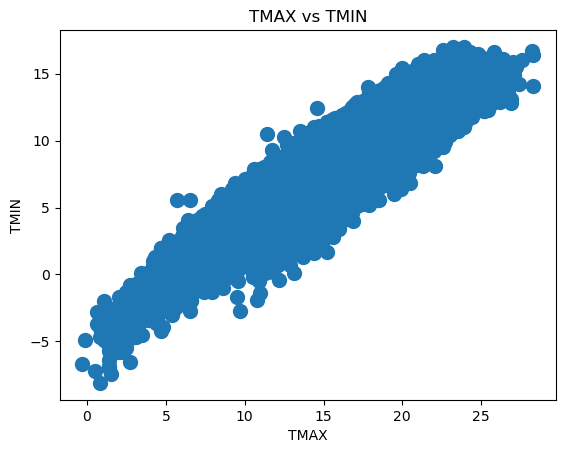

In [111]:
# Observe how the data is scattered on a scatter plot
# Plot scatter plots between each two features
# If any two features show a linear relationship, select only one of those two features
plt.scatter(df['TMAX'], df['TMIN'], s=100)
plt.title('TMAX vs TMIN')
plt.xlabel('TMAX')
plt.ylabel('TMIN')

Text(0, 0.5, 'RAIN')

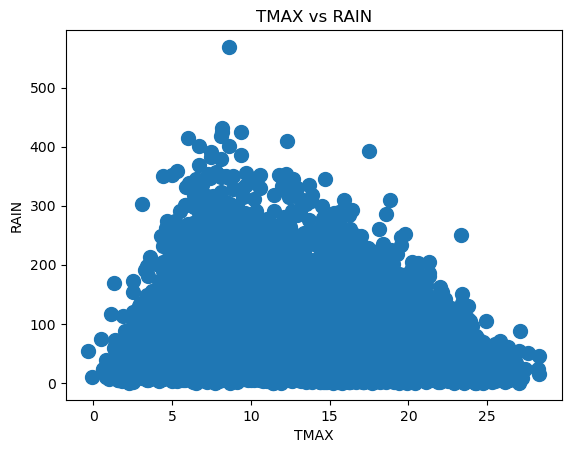

In [112]:
plt.scatter(df['TMAX'], df['RAIN'], s=100)
plt.title('TMAX vs RAIN')
plt.xlabel('TMAX')
plt.ylabel('RAIN')

Text(0, 0.5, 'AF')

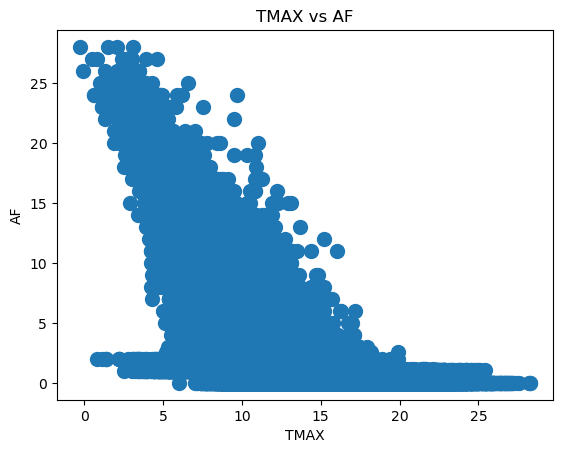

In [113]:
plt.scatter(df['TMAX'], df['AF'], s=100)
plt.title('TMAX vs AF')
plt.xlabel('TMAX')
plt.ylabel('AF')

Text(0, 0.5, 'SUN')

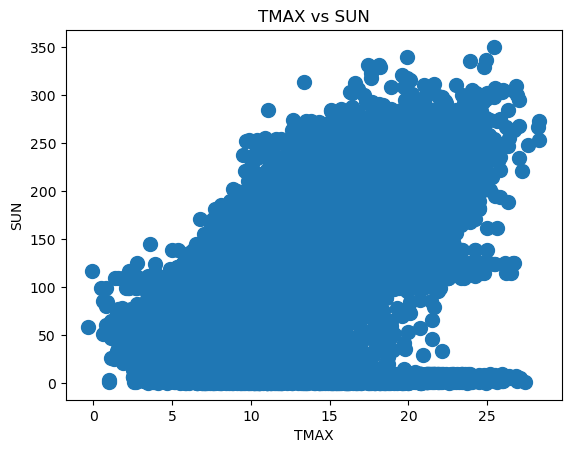

In [114]:
plt.scatter(df['TMAX'], df['SUN'], s=100)
plt.title('TMAX vs SUN')
plt.xlabel('TMAX')
plt.ylabel('SUN')

Text(0, 0.5, 'SUN')

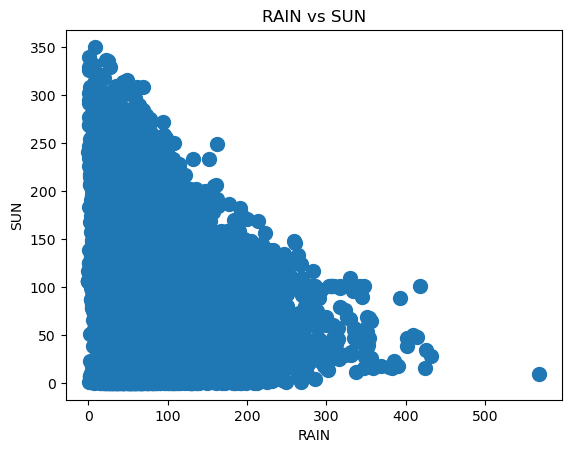

In [115]:
plt.scatter(df['RAIN'], df['SUN'], s=100)
plt.title('RAIN vs SUN')
plt.xlabel('RAIN')
plt.ylabel('SUN')

### *** Question B - 3 ***

In [145]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
happiness_data = pd.read_excel('2014-15 dataset.xls', sheet_name = 'Happiness', header=5)
happiness_data

,Area Codes,Area names,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,CV,...,CV.2,Lower limit.2,Upper limit.2,CV.3,Lower limit.3,Upper limit.3,CV.4,Lower limit.4,Upper limit.4,Unnamed: 24
0,K02000001,UNITED KINGDOM,NaN,NaN,8.93,16.68,40.28,34.11,7.46,1.07,...,0.41,39.95,40.61,0.48,33.78,34.43,0.1,7.45,7.47,165160
1,E92000001,ENGLAND,NaN,NaN,8.95,16.73,40.47,33.85,7.45,1.2,...,0.46,40.1,40.84,0.55,33.49,34.22,0.11,7.44,7.47,120320
2,E12000001,NORTH EAST,NaN,NaN,10.77,17.05,39.06,33.13,7.34,3.44,...,1.56,37.86,40.25,1.79,31.96,34.29,0.37,7.29,7.4,11310
3,E06000047,NaN,County Durham UA,NaN,10.84,17.04,37.76,34.36,7.37,10.36,...,4.78,34.21,41.3,5.08,30.93,37.8,1.11,7.21,7.53,890
4,E06000005,NaN,Darlington UA,NaN,9.76,15.43,38.68,36.13,7.46,10.71,...,4.65,35.14,42.22,4.94,32.62,39.64,1.08,7.3,7.62,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,"Source: April 2014 to March 2015, Annual Popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Area Codes     452 non-null    object
 1   Area names     14 non-null     object
 2   Unnamed: 2     92 non-null     object
 3   Unnamed: 3     335 non-null    object
 4   Unnamed: 4     441 non-null    object
 5   Unnamed: 5     441 non-null    object
 6   Unnamed: 6     441 non-null    object
 7   Unnamed: 7     441 non-null    object
 8   Unnamed: 8     441 non-null    object
 9   CV             441 non-null    object
 10  Lower limit    446 non-null    object
 11  Upper limit    441 non-null    object
 12  CV.1           441 non-null    object
 13  Lower limit.1  441 non-null    object
 14  Upper limit.1  441 non-null    object
 15  CV.2           441 non-null    object
 16  Lower limit.2  441 non-null    object
 17  Upper limit.2  441 non-null    object
 18  CV.3           441 non-null   

In [119]:
happiness_data.rename(columns = {'Unnamed: 4': 'Low', 'Unnamed: 5': 'Medium',
                            'Unnamed: 6': 'High', 'Unnamed: 7': 'Very High', 'Unnamed: 8': 'Average'}, inplace=True)
happiness_data= happiness_data.iloc[:, [1,4,5,6,7,8]]
happiness_data

,Area names,Low,Medium,High,Very High,Average
0,UNITED KINGDOM,8.93,16.68,40.28,34.11,7.46
1,ENGLAND,8.95,16.73,40.47,33.85,7.45
2,NORTH EAST,10.77,17.05,39.06,33.13,7.34
3,NaN,10.84,17.04,37.76,34.36,7.37
4,NaN,9.76,15.43,38.68,36.13,7.46
...,...,...,...,...,...,...
452,NaN,NaN,NaN,NaN,NaN,NaN
453,NaN,NaN,NaN,NaN,NaN,NaN
454,NaN,NaN,NaN,NaN,NaN,NaN
455,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# Read'regions' text file
with open('regions.txt', 'r') as regions_file:
    regions = regions_file.readlines()

# Create a dictionary to store regions name
regions_latitude_dict = {}          # We will use the latitude to combine happiness data with weather data
                                    # Thus, store the region name and the latitude in the dictionary
for region in regions:
    # Strip function removes any white spaces
    line = region.strip()
    split_line = line.split(',')
    region_name = split_line[1]
    latitude = float(split_line[2])
    regions_latitude_dict[region_name] = latitude

# Order the dictionary by the key
regions_latitude_dict = dict(sorted(regions_latitude_dict.items()))
regions_latitude_dict

{'EAST': 52.2,
 'EAST MIDLANDS': 53.0,
 'LONDON': 51.5,
 'NORTH EAST': 55.0,
 'NORTH WEST': 54.0,
 'NORTHERN IRELAND': 54.6,
 'SCOTLAND': 56.0,
 'SOUTH EAST': 51.3,
 'SOUTH WEST': 51.0,
 'WALES': 51.5,
 'WEST MIDLANDS': 52.5,
 'YORKSHIRE AND THE HUMBER': 53.6}

In [121]:
# In the happiness dataframe, include only the selected regions
regions_list = list(regions_latitude_dict.keys())

happiness_data.loc[:, 'Area names'] = happiness_data.loc[:, 'Area names'].str.strip()
happiness_data.loc[:, 'Area names'] = happiness_data.loc[:, 'Area names'].replace('[0-9]+', '', regex=True, inplace=False)

# Update the dataframe to contain only the records of the selected regions
happiness_data = happiness_data.loc[happiness_data['Area names'].isin(regions_list)]

# Sort the dataframe by the 'Area names' and 'Time Period' columns
happiness_data = happiness_data.sort_values(by=['Area names'], ascending=[True], na_position='first')

# Reset the indices so that we can concatenate this dataframe with the weather dataframe later
happiness_data.reset_index(drop=True, inplace=True)
happiness_data

C:\Users\faroo\AppData\Local\Temp\ipykernel_16932\3988330812.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_data.loc[:, 'Area names'] = happiness_data.loc[:, 'Area names'].str.strip()
C:\Users\faroo\AppData\Local\Temp\ipykernel_16932\3988330812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_data.loc[:, 'Area names'] = happiness_data.loc[:, 'Area names'].replace('[0-9]+', '', regex=True, inplace=False)


,Area names,Low,Medium,High,Very High,Average
0,EAST,8.53,15.69,41.69,34.09,7.51
1,EAST MIDLANDS,8.66,16.74,38.62,35.99,7.51
2,LONDON,8.32,18.3,42.2,31.18,7.38
3,NORTH EAST,10.77,17.05,39.06,33.13,7.34
4,NORTH WEST,10.17,16.82,39.1,33.91,7.39
5,NORTHERN IRELAND,6.76,14.66,37.57,41,7.75
6,SCOTLAND,9.16,16.9,39.75,34.19,7.45
7,SOUTH EAST,7.97,15.83,40.88,35.32,7.54
8,SOUTH WEST,8.79,15.92,40.44,34.84,7.5
9,WALES,9.56,16.54,39.45,34.45,7.44


In [122]:
# Create an empty dictionary to store the latitude data
stations_latitude_dict = {}

# Iterate over the list of stations
for station in stations_list:
    # Fetch the DataFrame for the station
    station_df = metdata.get_df(station)
    
    # Extract the latitude from the DataFrame
    latitude = station_df.lat
    
    # Store the station and respective latitude in the dictionary
    stations_latitude_dict[station] = latitude

print(stations_latitude_dict)

{'aberporth': 52.139, 'armagh': 54.352, 'ballypatrick': 55.181, 'bradford': 53.813, 'braemar': 57.006, 'camborne': 50.218, 'cambridge': 52.245, 'cardiff': 51.488, 'chivenor': 51.089, 'cwmystwyth': 52.358, 'dunstaffnage': 56.451, 'durham': 54.768, 'eastbourne': 50.762, 'eskdalemuir': 55.311, 'heathrow': 51.479, 'hurn': 50.779, 'lerwick': 60.139, 'leuchars': 56.377, 'lowestoft': 52.483, 'manston': 51.346, 'nairn': 57.593, 'newtonrigg': 54.67, 'oxford': 51.761, 'paisley': 55.846, 'ringway': 53.356, 'rossonwye': 51.911, 'shawbury': 52.794, 'sheffield': 53.381, 'southampton': 50.898, 'stornoway': 58.214, 'suttonbonington': 52.833, 'tiree': 56.5, 'valley': 53.252, 'waddington': 53.175, 'whitby': 54.481, 'wickairport': 58.454, 'yeovilton': 51.006}


In [123]:
# we will find the closest station for every region by using latitude values

region_station_list = []
for region in happiness_data['Area names']:
    region_lat = regions_latitude_dict.get(region)
    if region_lat is not None:
        closest_station = None
        min_lat_diff = float('inf')
        for station, lat in stations_latitude_dict.items():
            lat_diff = abs(region_lat - lat)
            if lat_diff < min_lat_diff:
                min_lat_diff = lat_diff
                closest_station = station
        curr_list = [region, closest_station]
        region_station_list.append(curr_list)

region_station_df = pd.DataFrame(region_station_list, columns=['REGION', 'STATION'])
region_station_df

,REGION,STATION
0,EAST,cambridge
1,EAST MIDLANDS,suttonbonington
2,LONDON,cardiff
3,NORTH EAST,ballypatrick
4,NORTH WEST,bradford
5,NORTHERN IRELAND,newtonrigg
6,SCOTLAND,paisley
7,SOUTH EAST,manston
8,SOUTH WEST,yeovilton
9,WALES,cardiff


In [124]:
station_by_region = dict(region_station_list)

In [125]:
happy_df = happiness_data.copy()

In [126]:
happy_df['Area names']

0                         EAST
1                EAST MIDLANDS
2                       LONDON
3                   NORTH EAST
4                   NORTH WEST
5             NORTHERN IRELAND
6                     SCOTLAND
7                   SOUTH EAST
8                   SOUTH WEST
9                        WALES
10               WEST MIDLANDS
11    YORKSHIRE AND THE HUMBER
Name: Area names, dtype: object

In [128]:
# Create empty lists to store data for each region
stations = []
sun = []
rain = []
tmax = []

# Loop through each region in happy_df
for region in happy_df['Area names']:
    # Get the station for the current region from region_station_df
    station = station_by_region[region]

    # Print region and its corresponding station
    print(region, '=>', station)

    # Append the station to the list
    stations.append(station)

    # Get the weather data for the current station from df
    station_df = df[df['STATION'] == station]

    # Calculate the mean values and append them to the respective lists
    sun.append(station_df['SUN'].mean())
    rain.append(station_df['RAIN'].mean())
    tmax.append(station_df['TMAX'].mean())

# Add the lists as new columns to happy_df
happy_df['STATION'] = stations
happy_df['SUN'] = sun
happy_df['RAIN'] = rain
happy_df['TMAX'] = tmax

# Display the updated happy_df with the added weather data
happy_df

EAST => cambridge
EAST MIDLANDS => suttonbonington
LONDON => cardiff
NORTH EAST => ballypatrick
NORTH WEST => bradford
NORTHERN IRELAND => newtonrigg
SCOTLAND => paisley
SOUTH EAST => manston
SOUTH WEST => yeovilton
WALES => cardiff
WEST MIDLANDS => lowestoft
YORKSHIRE AND THE HUMBER => bradford


,Area names,Low,Medium,High,Very High,Average,STATION,SUN,RAIN,TMAX
0,EAST,8.53,15.69,41.69,34.09,7.51,cambridge,124.946067,46.826592,14.603371
1,EAST MIDLANDS,8.66,16.74,38.62,35.99,7.51,suttonbonington,115.281858,52.004307,14.029775
2,LONDON,8.32,18.3,42.2,31.18,7.38,cardiff,124.152864,97.823783,14.752622
3,NORTH EAST,10.77,17.05,39.06,33.13,7.34,ballypatrick,106.953405,51.241546,11.575350
4,NORTH WEST,10.17,16.82,39.1,33.91,7.39,bradford,108.210861,73.858801,12.900000
5,NORTHERN IRELAND,6.76,14.66,37.57,41,7.75,newtonrigg,108.668381,80.905056,12.432772
6,SCOTLAND,9.16,16.9,39.75,34.19,7.45,paisley,108.061610,103.944007,12.966854
7,SOUTH EAST,7.97,15.83,40.88,35.32,7.54,manston,147.708043,49.303147,14.134365
8,SOUTH WEST,8.79,15.92,40.44,34.84,7.5,yeovilton,5.109895,59.866854,14.727528
9,WALES,9.56,16.54,39.45,34.45,7.44,cardiff,124.152864,97.823783,14.752622


In [131]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area names  12 non-null     object 
 1   Low         12 non-null     object 
 2   Medium      12 non-null     object 
 3   High        12 non-null     object 
 4   Very High   12 non-null     object 
 5   Average     12 non-null     object 
 6   STATION     12 non-null     object 
 7   SUN         12 non-null     float64
 8   RAIN        12 non-null     float64
 9   TMAX        12 non-null     float64
dtypes: float64(3), object(7)
memory usage: 1.1+ KB


In [132]:
# Convert numeric columns to float
numeric_columns = ['Low', 'Medium', 'High', 'Very High', 'Average', 'SUN', 'RAIN', 'TMAX']
happy_df[numeric_columns] = happy_df[numeric_columns].apply(pd.to_numeric)

# Now, the columns will be of float type
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area names  12 non-null     object 
 1   Low         12 non-null     float64
 2   Medium      12 non-null     float64
 3   High        12 non-null     float64
 4   Very High   12 non-null     float64
 5   Average     12 non-null     float64
 6   STATION     12 non-null     object 
 7   SUN         12 non-null     float64
 8   RAIN        12 non-null     float64
 9   TMAX        12 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.1+ KB


In [136]:
happy_df = happy_df.select_dtypes(include=np.number)
happy_df

,Low,Medium,High,Very High,Average,SUN,RAIN,TMAX
0,8.53,15.69,41.69,34.09,7.51,124.946067,46.826592,14.603371
1,8.66,16.74,38.62,35.99,7.51,115.281858,52.004307,14.029775
2,8.32,18.30,42.20,31.18,7.38,124.152864,97.823783,14.752622
3,10.77,17.05,39.06,33.13,7.34,106.953405,51.241546,11.575350
4,10.17,16.82,39.10,33.91,7.39,108.210861,73.858801,12.900000
5,6.76,14.66,37.57,41.00,7.75,108.668381,80.905056,12.432772
6,9.16,16.90,39.75,34.19,7.45,108.061610,103.944007,12.966854
7,7.97,15.83,40.88,35.32,7.54,147.708043,49.303147,14.134365
8,8.79,15.92,40.44,34.84,7.50,5.109895,59.866854,14.727528
9,9.56,16.54,39.45,34.45,7.44,124.152864,97.823783,14.752622


In [137]:
# Apply the correlation function
corr = happy_df.corr()
corr

,Low,Medium,High,Very High,Average,SUN,RAIN,TMAX
Low,1.000000,0.450146,-0.163375,-0.530768,-0.832549,-0.102908,0.005630,-0.334082
Medium,0.450146,1.000000,0.443096,-0.861249,-0.828596,0.209326,0.224402,0.079946
High,-0.163375,0.443096,1.000000,-0.701882,-0.324755,0.142584,-0.147386,0.620505
Very High,-0.530768,-0.861249,-0.701882,1.000000,0.896708,-0.119792,-0.002001,-0.254024
Average,-0.832549,-0.828596,-0.324755,0.896708,1.000000,-0.049703,-0.068410,0.029938
SUN,-0.102908,0.209326,0.142584,-0.119792,-0.049703,1.000000,0.015357,-0.089563
RAIN,0.005630,0.224402,-0.147386,-0.002001,-0.068410,0.015357,1.000000,0.036634
TMAX,-0.334082,0.079946,0.620505,-0.254024,0.029938,-0.089563,0.036634,1.000000


In [144]:
print("Average variance:", happy_df['Average'].var())
print("Low variance:", happy_df['Low'].var())
print("Medium variance:", happy_df['Medium'].var())
print("High variance:", happy_df['High'].var())
print("Very High variance:", happy_df['Very High'].var())

Average variance: 0.01139015151515152
Low variance: 1.2144265151515155
Medium variance: 0.8959151515151516
High variance: 2.1351999999999993
Very High variance: 5.871893181818184


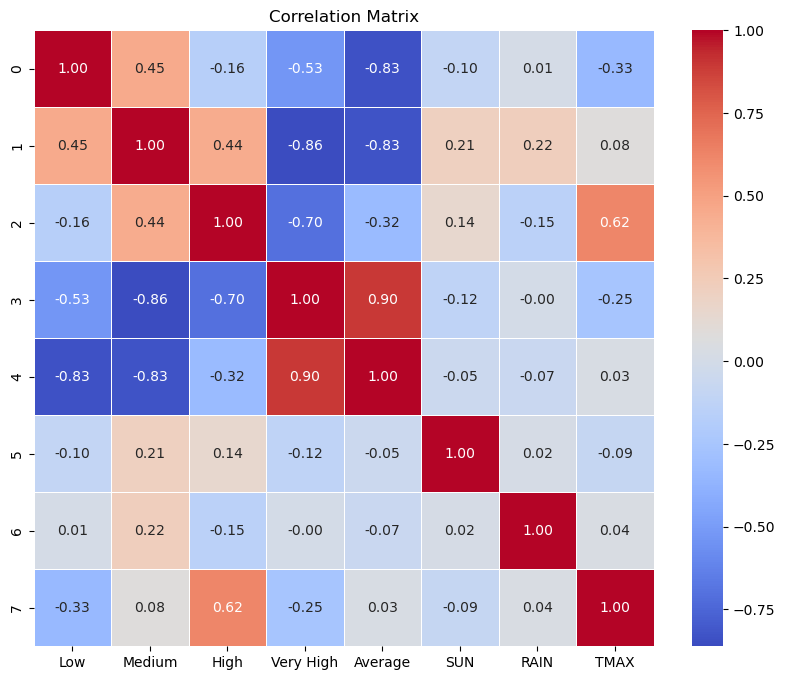

In [146]:


# Replace this with your actual correlation matrix
correlation_matrix = pd.DataFrame({
    'Low': [1.000000, 0.450146, -0.163375, -0.530768, -0.832549, -0.102908, 0.005630, -0.334082],
    'Medium': [0.450146, 1.000000, 0.443096, -0.861249, -0.828596, 0.209326, 0.224402, 0.079946],
    'High': [-0.163375, 0.443096, 1.000000, -0.701882, -0.324755, 0.142584, -0.147386, 0.620505],
    'Very High': [-0.530768, -0.861249, -0.701882, 1.000000, 0.896708, -0.119792, -0.002001, -0.254024],
    'Average': [-0.832549, -0.828596, -0.324755, 0.896708, 1.000000, -0.049703, -0.068410, 0.029938],
    'SUN': [-0.102908, 0.209326, 0.142584, -0.119792, -0.049703, 1.000000, 0.015357, -0.089563],
    'RAIN': [0.005630, 0.224402, -0.147386, -0.002001, -0.068410, 0.015357, 1.000000, 0.036634],
    'TMAX': [-0.334082, 0.079946, 0.620505, -0.254024, 0.029938, -0.089563, 0.036634, 1.000000]
})

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

####  *** Here, the overall, the correlation coefficients provide some insights into the relationships between happiness levels and weather variables. However, correlation does not imply causation, and other factors not included in the data may also influence happiness levels in different regions.***

###  *** The END ***